In [1]:
pl = pd.read_csv('GMagAO-X-target-list.csv')
spt = pl['SpT Number'].copy()
spt.loc[np.where(np.isnan(spt))[0]] = pl['Mam Inferred SpT from Teff'][np.where(np.isnan(spt))[0]]
#[c for c in pl.columns]

In [62]:
[c for c in pl.columns]

['loc_rowid',
 'pl_name',
 'hostname',
 'hd_name',
 'hip_name',
 'gaia_id',
 'default_flag',
 'sy_snum',
 'sy_pnum',
 'discoverymethod',
 'disc_year',
 'soltype',
 'pl_controv_flag',
 'pl_refname',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_rade',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radelim',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_masse',
 'pl_masseerr1',
 'pl_masseerr2',
 'pl_masselim',
 'pl_massj',
 'pl_massjerr1',
 'pl_massjerr2',
 'pl_massjlim',
 'pl_msinie',
 'pl_msinieerr1',
 'pl_msinieerr2',
 'pl_msinielim',
 'pl_msinij',
 'pl_msinijerr1',
 'pl_msinijerr2',
 'pl_msinijlim',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassprov',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_insol',
 'pl_insolerr1',
 'pl_insolerr2',
 'pl_insollim

In [2]:
orbits = pl[['pl_orbsmax','pl_orbper','pl_orbincl','pl_orbeccen','pl_masse','pl_msinie','st_mass', 
             'sy_dist','Re', 'pl_orblper','pl_name']]
orbits['SpT Number'] = spt
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbsmax']))[0])
orbits = orbits.reset_index(drop=True)
orbits = orbits.drop(np.where(np.isnan(orbits['st_mass']))[0])
orbits = orbits.reset_index(drop=True)
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbper']))[0])
orbits = orbits.reset_index(drop=True)
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbeccen']))[0])
orbits = orbits.reset_index(drop=True)


orbits['pl_mass_or_msini_e'] = orbits['pl_masse']
for i in range(len(orbits)):
    if np.isnan(orbits['pl_masse'][i]):
        orbits['pl_mass_or_msini_e'][i] = orbits['pl_msinie'][i]
        
orbits

/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_3673/388503433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orbits['SpT Number'] = spt
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_3673/388503433.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orbits['pl_mass_or_msini_e'][i] = orbits['pl_msinie'][i]


,pl_orbsmax,pl_orbper,pl_orbincl,pl_orbeccen,pl_masse,pl_msinie,st_mass,sy_dist,Re,pl_orblper,pl_name,SpT Number,pl_mass_or_msini_e
0,2.8000,1796.4000,NaN,0.338,NaN,1506.45000,0.90,17.9323,11.981839,22.580,14 Her b,4.722567,1506.45000
1,1.6600,798.5000,NaN,0.680,NaN,565.73740,1.08,21.1397,11.686000,NaN,16 Cyg B b,4.387715,565.73740
2,0.9950,335.1000,NaN,0.289,NaN,3140.03000,1.16,44.6570,11.663215,307.000,30 Ari B b,3.600000,3140.03000
3,2.1000,1076.6000,NaN,0.012,NaN,778.68350,1.06,13.7967,11.843042,147.000,47 UMa b,4.000000,778.68350
4,3.6000,2391.0000,NaN,0.098,NaN,171.62100,1.06,13.7967,10.502257,295.000,47 UMa c,4.307809,171.62100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.2300,39.6450,NaN,0.028,NaN,349.61300,1.00,17.4671,11.337947,30.000,rho CrB b,4.369942,349.61300
406,0.4157,102.5570,NaN,0.044,NaN,28.12781,0.91,17.4671,5.924378,16.000,rho CrB c,4.374341,28.12781
407,0.8290,240.9402,NaN,0.245,4443.24113,622.94368,1.31,13.4054,11.739158,247.659,ups And c,3.800000,4443.24113
408,2.5170,1282.4100,NaN,0.294,NaN,1303.09647,1.29,13.4054,11.976042,73.800,ups And d,4.125273,1303.09647


In [3]:
len(np.where(np.isnan(orbits['pl_orblper']))[0])


From Cahoy 2010 Eqn 1:

$$ C(\alpha) = \frac{2}{3} A_g(\lambda) \left(\frac{R_p}{\rho}\right)^2 \left[\frac{\sin\alpha + (\pi - \alpha)\cos\alpha}{\pi} \right]$$
where<br>
$C(\alpha)$ is planet-star contrast<br>
$ A_g(\lambda)$ is geometric albedo<br>
$R_p$ is planet radius<br>
$\rho$ is planet-star separation<br>

And phase as a function of orbital elements is given by:<br>

$$\alpha = \cos^{-1} \left(\sin(i) \;\times\; \sin(\theta + \omega_p)\right)$$
where<br>
$\omega_p$ is argument of periastron<br>
$i$ is inclination, with i=90 being edge on and i = 0,180 being face on<br>
$\theta$ is the true anomaly with
$$\theta = 2 \tan^{-1} \left(\sqrt{\frac{1+e}{1-e}} \tan(E/2) \right)$$
where<br>
$e$ is the eccentricity<br>
$E$ is the eccentricity anomaly<br>
with
$$M = E - e \sin E$$
$$M = 2\pi \frac{\Delta t}{P}$$
where<br>
$M$ is the mean anomaly<br>
$\Delta t$ is the time since periastron passage<br>
$P$ is the orbital period

In [3]:
n = 100
i = np.where(~np.isnan(orbits['pl_orbincl']))[0][1]
meananom = np.linspace(0,2*np.pi,n)
inc = orbits.loc[i]['pl_orbincl'] # deg, keplerian_to_cartesian takes angles in degrees
ecc = orbits.loc[i]['pl_orbeccen']
sma = orbits.loc[i]['pl_orbsmax']*u.au
argp = orbits.loc[i]['pl_orblper'] # deg
lon = 0
star_mass = orbits.loc[i]['st_mass']
pl_mass = orbits.loc[i]['pl_mass_or_msini_e']
distance = orbits.loc[i]['sy_dist']
print(orbits.loc[i]['pl_name'])

from myastrotools.reflectx_supplemental import (keplerian_to_cartesian, keplersconstant, danby_solve, 
                                                eccentricity_anomaly, GetPhaseAngle, ComputeFluxRatio,
                                               Get_LOD)

kep = keplersconstant(star_mass*u.Msun,pl_mass*u.Mearth)

seps = []
conts = []
alphas = []
for j in range(len(meananom)):
    if np.isnan(argp):
        seps2 = []
        for w in np.linspace(0,2*np.pi, 50):
            pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,w,lon,meananom[j],kep)
            sep = np.sqrt(pos[0]**2,pos[1]**2)
            seps2.append(sep.value)
        sep = np.mean(seps2)*u.au
    else:
        pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,
                                               argp,lon,meananom[j],kep)
        sep = np.sqrt(pos[0]**2,pos[1]**2)


    alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)

    Rp = orbits.loc[i]['Re'] * u.Rearth
    cont = ComputeFluxRatio(Rp, sep, alpha, Ag = 0.5)
    
    seps.append(sep.value)
    conts.append(cont.value)
    alphas.append(alpha)
    
seps = np.array(seps)
conts = np.array(conts)
alphas = np.array(alphas)


BD+45 564 b


In [4]:
# Now what parts of the orbit will be inside the IWA?
seps_mas = (seps/distance)*u.arcsec.to(u.mas)

# What lod?
sloan_JH_filters = {'g': {'central wavelength':4782.325,'wavelength_unit':u.AA},
                    'r': {'central wavelength':6260.406,'wavelength_unit':u.AA},
                    'i': {'central wavelength':7732.03,'wavelength_unit':u.AA},
                    'z': {'central wavelength':966.592,'wavelength_unit':u.nm},
                    'J': {'central wavelength':1.246,'wavelength_unit':u.um},
                    'H': {'central wavelength':1.621,'wavelength_unit':u.um}}

from myastrotools.reflectx_supplemental import (SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, 
                                                NIRC2HFilter, NIRC2JFilter)

filters = [SloangFilter(),SloanrFilter(),SloaniFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]

f = filters[2]
lod = Get_LOD(f.central_wavelength*f.wavelength_unit, 6.5*u.m)

seps_lod_magaox = seps_mas/lod

lod = Get_LOD(f.central_wavelength*f.wavelength_unit, 25.4*u.m)

seps_lod_gmagaox = seps_mas/lod
seps_lod_gmagaox

array([0.73186606, 0.56350771, 0.39180268, 0.21778888, 0.04249602,
       0.13304876, 0.307833  , 0.48087026, 0.65121041, 0.81794868,
       0.98023325, 1.13727135, 1.28833394, 1.43275878, 1.56995225,
       1.69938986, 1.82061569, 1.93324089, 2.03693765, 2.13144815,
       2.21657   , 2.29215469, 2.35810496, 2.41437094, 2.46094635,
       2.49786474, 2.52519588, 2.54304235, 2.55153627, 2.55083639,
       2.54112584, 2.5226085 , 2.49550697, 2.46006062, 2.41652373,
       2.3651638 , 2.30626015, 2.24010257, 2.16699029, 2.08723093,
       2.00113978, 1.90903904, 1.81125733, 1.70812917, 1.59999465,
       1.48719913, 1.37009309, 1.24903192, 1.12437592, 0.99649022,
       0.86576833, 0.7325587 , 0.59724678, 0.46021743, 0.3218607 ,
       0.18257194, 0.04275199, 0.09719276, 0.23685021, 0.37580244,
       0.51362572, 0.6498904 , 0.78416104, 0.91599646, 1.04494996,
       1.17057191, 1.29240884, 1.40999353, 1.52286107, 1.63054391,
       1.73257295, 1.8284789 , 1.91779383, 2.00005311, 2.07479

In [28]:
# Remove ones closer than IWA:
IWA = 2 #lod
ind = np.where(seps_lod_gmagaox > IWA)[0]
seps_lod_gmagaox[ind],conts[ind], alphas[ind]

(array([2.03693765, 2.13144815, 2.21657   , 2.29215469, 2.35810496,
        2.41437094, 2.46094635, 2.49786474, 2.52519588, 2.54304235,
        2.55153627, 2.55083639, 2.54112584, 2.5226085 , 2.49550697,
        2.46006062, 2.41652373, 2.3651638 , 2.30626015, 2.24010257,
        2.16699029, 2.08723093, 2.00113978, 2.00005311, 2.07479756,
        2.14157604, 2.1999483 , 2.24948836, 2.28978812, 2.32046158,
        2.34114927, 2.35152325, 2.35129237, 2.34020789, 2.31806931,
        2.28473035, 2.24010499, 2.18417185, 2.11697997, 2.03866086]),
 array([5.64564968e-08, 5.13508398e-08, 4.72850705e-08, 4.40312497e-08,
        4.14253191e-08, 3.93475224e-08, 3.77096346e-08, 3.64464602e-08,
        3.55100844e-08, 3.48659561e-08, 3.44902274e-08, 3.43679894e-08,
        3.44921639e-08, 3.48629654e-08, 3.54878175e-08, 3.63817081e-08,
        3.75680383e-08, 3.90800440e-08, 4.09629472e-08, 4.32770876e-08,
        4.61024312e-08, 4.95450735e-08, 5.37467167e-08, 5.40677655e-08,
        5.04212989e-08

In [73]:
def GetOrbitalSepContAlphaOutsideIWA(sma, ecc, inc, argp, lon, star_mass, pl_mass, distance, IWA, lod,
                           n=100):
    n = 100
    meananom = np.linspace(0,2*np.pi,n)
    from myastrotools.reflectx_supplemental import (keplerian_to_cartesian, keplersconstant, danby_solve, 
                                                    eccentricity_anomaly, GetPhaseAngle, ComputeFluxRatio,
                                                   Get_LOD)

    kep = keplersconstant(star_mass*u.Msun,pl_mass*u.Mearth)
    seps = []
    conts = []
    alphas = []
    for j in range(len(meananom)):
        if np.isnan(argp):
            seps2 = []
            argps = []
            for w in np.linspace(0,2*np.pi, 50):
                pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,w,lon,meananom[j],kep)
                sep = np.sqrt(pos[0]**2,pos[1]**2)
                seps2.append(sep.value)
                argps.append(w)
            argp = np.mean(argps)
            
            sep = np.mean(seps2)*u.au
            alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)
            
        else:
            pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,
                                                   argp,lon,meananom[j],kep)
            sep = np.sqrt(pos[0]**2,pos[1]**2)
            alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)


        Rp = orbits.loc[i]['Re'] * u.Rearth
        cont = ComputeFluxRatio(Rp, sep, alpha, Ag = 0.3)

        seps.append(sep.value)
        conts.append(cont.value)
        alphas.append(alpha)

    seps = np.array(seps)
    conts = np.array(conts)
    alphas = np.array(alphas)
    
    # Now what parts of the orbit will be inside the IWA?
    seps_mas = (seps/distance)*u.arcsec.to(u.mas)
    seps_lod = seps_mas/lod
    
    #ind = np.where(seps_lod > IWA)[0]
    
    #return seps_lod[ind], conts[ind], alphas[ind], [conts, alphas, seps_mas, seps_lod]
    return conts, alphas, seps_mas, seps_lod

### Inputs:
## Grab orbital parameters:
i = np.where(~np.isnan(orbits['pl_orbincl']))[0][18]
inc = orbits.loc[i]['pl_orbincl'] # deg, keplerian_to_cartesian takes angles in degrees
ecc = orbits.loc[i]['pl_orbeccen']
sma = orbits.loc[i]['pl_orbsmax']*u.au
argp = orbits.loc[i]['pl_orblper'] # deg
lon = 0
star_mass = orbits.loc[i]['st_mass']
pl_mass = orbits.loc[i]['pl_mass_or_msini_e']
distance = orbits.loc[i]['sy_dist']
print(orbits.loc[i]['pl_name'])

# Filter:
from myastrotools.reflectx_supplemental import (SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, 
                                                NIRC2HFilter, NIRC2JFilter)
filters = [SloangFilter(),SloanrFilter(),SloaniFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]
from myastrotools.reflectx_supplemental import Get_LOD
f = filters[2]
lod_magaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 6.5*u.m)
lod_gmagaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 25.4*u.m)

conts, alphas, seps_mas, seps_lod = GetOrbitalSepContAlphaOutsideIWA(sma, ecc, inc, argp, lon, 
                                                              star_mass, pl_mass, distance, 2, lod_gmagaox,
                                                              n=100)

conts, alphas, seps_lod


HD 95338 b


(array([1.33467834e-07, 1.61590271e-07, 1.97887762e-07, 2.45769761e-07,
        3.10669192e-07, 4.01637120e-07, 5.34671675e-07, 7.40254820e-07,
        1.08248822e-06, 1.71582715e-06, 3.09554698e-06, 7.09985403e-06,
        2.96898382e-05, 1.72748649e-02, 2.53132871e-05, 6.55829552e-06,
        2.94051188e-06, 1.65589397e-06, 1.05729676e-06, 7.31106113e-07,
        5.34214703e-07, 4.06469878e-07, 3.19010561e-07, 2.56588857e-07,
        2.10534665e-07, 1.75623688e-07, 1.48556522e-07, 1.27166874e-07,
        1.09985178e-07, 9.59862847e-08, 8.44393674e-08, 7.48079379e-08,
        6.66948577e-08, 5.98000771e-08, 5.38935609e-08, 4.87966167e-08,
        4.43687747e-08, 4.04984113e-08, 3.70959431e-08, 3.40888186e-08,
        3.14177842e-08, 2.90340679e-08, 2.68972313e-08, 2.49735154e-08,
        2.32345544e-08, 2.16563666e-08, 2.02185563e-08, 1.89036778e-08,
        1.76967246e-08, 1.65847159e-08, 1.55570112e-08, 1.46027472e-08,
        1.37135552e-08, 1.28817377e-08, 1.21004341e-08, 1.136348

In [74]:

sep_weighted_mean = np.sum(seps_lod*conts)/np.sum(conts)
phase_weighted_mean = np.sum(alphas*conts)/np.sum(conts)
sep_weighted_mean, np.mean(seps_lod)

(0.004003271488995336, 0.7527315954162741)

In [75]:
ind = np.where(seps_lod == np.max(seps_lod))[0]
seps_lod[ind],conts[ind],alphas[ind]

(array([1.33007356]), array([2.68972313e-08]), array([94.59230044]))

From my orbital mechanics notes:<br>

$$<r(t)> = a \left(1 + 1/2 e^2\right)$$

In [76]:
seps_lod

array([0.83218194, 0.79424231, 0.75012787, 0.70023526, 0.6450076 ,
       0.58493977, 0.52056597, 0.45244677, 0.38115659, 0.30727197,
       0.2313612 , 0.15397559, 0.07564242, 0.00314037, 0.08190788,
       0.16023047, 0.23770123, 0.31398014, 0.3887443 , 0.46170635,
       0.53261111, 0.60123352, 0.66737644, 0.73086843, 0.79156153,
       0.84932909, 0.90406372, 0.9556754 , 1.00408968, 1.04924625,
       1.09109091, 1.1295935 , 1.16472719, 1.19647389, 1.2248233 ,
       1.24977211, 1.27132318, 1.28948496, 1.30427087, 1.31569884,
       1.32379087, 1.32857272, 1.33007356, 1.32832578, 1.32336477,
       1.31522879, 1.30395885, 1.28959866, 1.2721946 , 1.25179571,
       1.22847005, 1.20225233, 1.17320688, 1.14139434, 1.10687852,
       1.06972659, 1.03000927, 0.98780113, 0.94318088, 0.89623169,
       0.84704157, 0.7957038 , 0.74231733, 0.68698734, 0.62982572,
       0.57095169, 0.51049243, 0.44857926, 0.38535549, 0.32098248,
       0.25562684, 0.18946697, 0.122694  , 0.0555126 , 0.01185

In [77]:
sep_mean = sma * (1 + 0.5*ecc**2)
sep_mean_mas = (sep_mean.value/distance)*u.arcsec.to(u.mas)
sep_mean_lod = sep_mean_mas/lod_gmagaox
sep_mean_lod

1.151299556496763

In [78]:
args = np.argsort(np.abs(seps_lod - sep_mean_lod))
args

array([53, 32, 31, 52, 54, 33, 51, 30, 34, 50, 55, 35, 49, 29, 36, 48, 56,
       37, 47, 28, 46, 38, 57, 45, 39, 44, 40, 43, 41, 42, 27, 58, 94, 93,
       95, 92, 96, 26, 59, 91, 97, 90, 98, 25, 60, 89, 99,  0, 88, 61,  1,
       24, 87,  2, 62, 86, 23,  3, 63, 85, 22,  4, 84, 64, 21,  5, 83, 65,
       20, 82,  6, 66, 81, 19,  7, 67, 80, 18, 68,  8, 79, 69, 17,  9, 78,
       70, 16, 10, 77, 71, 15, 11, 76, 72, 14, 75, 12, 73, 74, 13])

In [79]:
args[:2],alphas[args[:2]],conts[args[:2]]

(array([53, 32]),
 array([122.14413964,  67.71727476]),
 array([1.28817377e-08, 6.66948577e-08]))

average orbital separation values:

In [91]:
sep_mean = sma * (1 + 0.5*ecc**2)
sep_mean_mas = (sep_mean.value/distance)*u.arcsec.to(u.mas)
sep_mean_lod = sep_mean_mas/lod_gmagaox
average_separation = sep_mean_lod

# find where in array is closest to the mean sep:
args = np.argsort(np.abs(seps_lod - sep_mean_lod))
# if there is more than one crossing take the phase closest to full:

phase_at_average_separation = np.min(alphas[args[:2]])

ind = np.where(alphas[args[:2]] == np.min(alphas[args[:2]]))[0]
contrast_at_average_separation = conts[args[ind]]
contrast_at_average_separation

array([6.66948577e-08])

values at location of highest contrast:

In [95]:
ind = np.where(conts == np.max(conts))[0]
contrast_at_highest_contrast = conts[ind]
phase_at_highest_contrast = alphas[ind]
separation_at_highest_contrast = seps_lod[ind]

values at farthest separation:

In [97]:
ind = np.where(seps_lod == np.max(seps_lod))[0]
contrast_at_largest_separation = conts[ind]
phase_at_largest_separation = alphas[ind]
separation_at_largest_separation = seps_lod[ind]

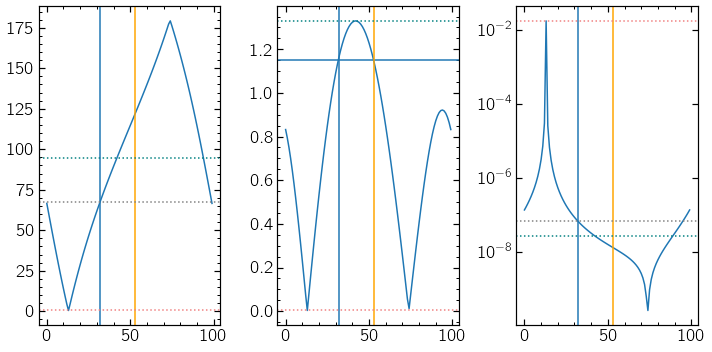

In [98]:

%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(range(len(conts)),alphas)
plt.axvline(x = args[0],color='orange')
plt.axvline(x = args[1])
plt.axhline(y = phase_at_average_separation, ls=':', color='grey')
plt.axhline(y = phase_at_highest_contrast, ls=':', color='lightcoral')
plt.axhline(y = phase_at_largest_separation, ls=':', color='teal')
plt.subplot(132)
plt.plot(range(len(conts)),seps_lod)
plt.axhline(y = sep_mean_lod)
plt.axvline(x = args[0],color='orange')
plt.axvline(x = args[1])
plt.axhline(y = separation_at_highest_contrast, ls=':', color='lightcoral')
plt.axhline(y = separation_at_largest_separation, ls=':', color='teal')
plt.subplot(133)
plt.plot(range(len(conts)),conts)
plt.axvline(x = args[0],color='orange')
plt.axvline(x = args[1])
plt.axhline(y = contrast_at_average_separation, ls=':', color='grey')
plt.axhline(y = contrast_at_highest_contrast, ls=':', color='lightcoral')
plt.axhline(y = contrast_at_largest_separation, ls=':', color='teal')
plt.gca().set_yscale('log')
plt.tight_layout()

/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_55668/2215068464.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plotx = np.array([sep_mean_lod, separation_at_highest_contrast, separation_at_largest_separation])


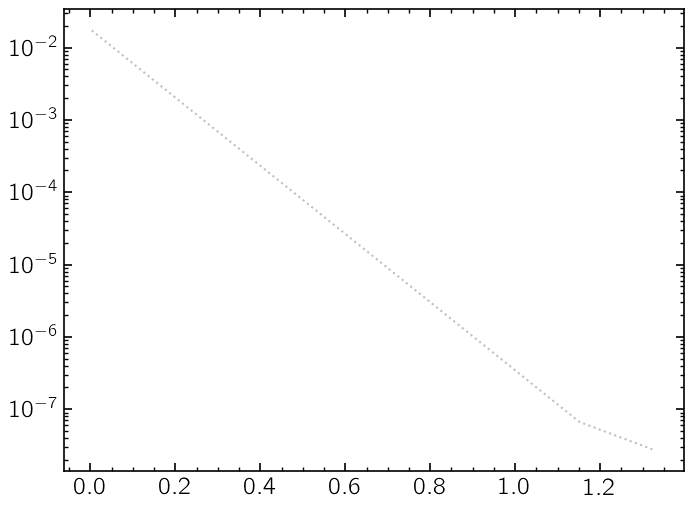

In [107]:
%matplotlib inline
plotx = np.array([sep_mean_lod, separation_at_highest_contrast, separation_at_largest_separation])
ploty = np.array([contrast_at_average_separation, contrast_at_highest_contrast, contrast_at_largest_separation])
args = np.argsort(plotx)
plt.plot(plotx[args],ploty[args], marker='None', ls=':', color='grey', alpha = 0.5)
plt.scatter(plo)
plt.gca().set_yscale('log')

# Put it together into a function

In [3]:
def GetOrbitalSepContAlpha(sma, ecc, inc, argp, lon, star_mass, pl_mass, distance, lod, n=100,
                          Ag = 0.3):
    meananom = np.linspace(0,2*np.pi,n)
    from myastrotools.reflectx_supplemental import (keplerian_to_cartesian, keplersconstant, danby_solve, 
                                                    eccentricity_anomaly, GetPhaseAngle, ComputeFluxRatio,
                                                   Get_LOD)

    kep = keplersconstant(star_mass*u.Msun,pl_mass*u.Mearth)
    seps = []
    conts = []
    alphas = []
    for j in range(len(meananom)):
        if np.isnan(argp):
            seps2 = []
            argps = []
            for w in np.linspace(0,2*np.pi, 50):
                pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,w,lon,meananom[j],kep)
                sep = np.sqrt(pos[0]**2,pos[1]**2)
                seps2.append(sep.value)
                argps.append(w)
            argp = np.mean(argps)
            
            sep = np.mean(seps2)*u.au
            alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)
            
        else:
            pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,
                                                   argp,lon,meananom[j],kep)
            sep = np.sqrt(pos[0]**2,pos[1]**2)
            alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)


        Rp = orbits.loc[i]['Re'] * u.Rearth
        cont = ComputeFluxRatio(Rp, sep, alpha, Ag = Ag)

        seps.append(sep.value)
        conts.append(cont.value)
        alphas.append(alpha)

    seps = np.array(seps)
    conts = np.array(conts)
    alphas = np.array(alphas)
    
    # Now what parts of the orbit will be inside the IWA?
    seps_mas = (seps/distance)*u.arcsec.to(u.mas)
    seps_lod = seps_mas/lod
    
    #ind = np.where(seps_lod > IWA)[0]
    
    #return seps_lod[ind], conts[ind], alphas[ind], [conts, alphas, seps_mas, seps_lod]
    return conts, alphas, seps_mas, seps_lod

orbits['contrast_at_highest_contrast'] = np.nan
orbits['separation_at_highest_contrast'] = np.nan
orbits['phase_at_highest_contrast'] = np.nan
orbits['separation_at_largest_separation'] = np.nan
orbits['contrast_at_largest_separation'] = np.nan
orbits['phase_at_largest_separation'] = np.nan
orbits['separation_at_average_separation'] = np.nan
orbits['contrast_at_average_separation'] = np.nan
orbits['phase_at_average_separation'] = np.nan

from myastrotools.tools import update_progress
import warnings
warnings.filterwarnings('ignore')

for i in range(len(orbits)):
    ### Inputs:
    ## Grab orbital parameters:
    inc = orbits.loc[i]['pl_orbincl'] # deg, keplerian_to_cartesian takes angles in degrees
    if np.isnan(inc):
        inc = 60
    ecc = orbits.loc[i]['pl_orbeccen']
    sma = orbits.loc[i]['pl_orbsmax']*u.au
    argp = orbits.loc[i]['pl_orblper'] # deg
    lon = 0
    star_mass = orbits.loc[i]['st_mass']
    pl_mass = orbits.loc[i]['pl_mass_or_msini_e']
    distance = orbits.loc[i]['sy_dist']

    # Filter:
    from myastrotools.reflectx_supplemental import (SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, 
                                                    NIRC2HFilter, NIRC2JFilter)
    filters = [SloangFilter(),SloanrFilter(),SloaniFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]
    from myastrotools.reflectx_supplemental import Get_LOD
    f = filters[2]
    lod_magaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 6.5*u.m)
    lod_gmagaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 25.4*u.m)

    conts, alphas, seps_mas, seps_lod = GetOrbitalSepContAlpha(sma, ecc, inc, argp, lon, 
                                                                  star_mass, pl_mass, distance, lod_gmagaox,
                                                                  n=100)
    ### average orbital separation:
    sep_mean = sma * (1 + 0.5*ecc**2)
    sep_mean_mas = (sep_mean.value/distance)*u.arcsec.to(u.mas)
    sep_mean_lod = sep_mean_mas/lod_gmagaox
    average_separation = sep_mean_lod
    sep_mean = sma * (1 + 0.5*ecc**2)
    sep_mean_mas = (sep_mean.value/distance)*u.arcsec.to(u.mas)
    sep_mean_lod = sep_mean_mas/lod_gmagaox
    average_separation = sep_mean_lod
    # find where in array is closest to the mean sep:
    args = np.argsort(np.abs(seps_lod - sep_mean_lod))
    # if there is more than one crossing take the phase closest to full:
    phase_at_average_separation = np.min(alphas[args[:2]])
    # get that contrast too:
    ind = np.where(alphas[args[:2]] == np.min(alphas[args[:2]]))[0]
    contrast_at_average_separation = conts[args[ind]]
    orbits['separation_at_average_separation'][i] = average_separation
    orbits['contrast_at_average_separation'][i] = contrast_at_average_separation
    orbits['phase_at_average_separation'][i] = phase_at_average_separation
    
    ### at highest contrast:
    ind = np.where(conts == np.max(conts))[0]
    orbits['contrast_at_highest_contrast'][i] = conts[ind]
    orbits['separation_at_highest_contrast'][i] = seps_lod[ind]
    orbits['phase_at_highest_contrast'][i] = alphas[ind]
    
    ### at farthest separation:
    ind = np.where(seps_lod == np.max(seps_lod))[0]
    if len(ind) > 1:
        ind = ind[0]
    orbits['phase_at_largest_separation'][i] = alphas[ind]
    orbits['separation_at_largest_separation'][i] = seps_lod[ind]
    orbits['contrast_at_largest_separation'][i] = conts[ind]
    update_progress(i,len(orbits)-1)
    
    

100% (409 of 409): |####################|  Done...


In [5]:
orbits.to_csv('GMagAO-X-RV-targets-with-orbital-params.csv', index=False)
orbits

,pl_orbsmax,pl_orbper,pl_orbincl,pl_orbeccen,pl_masse,pl_msinie,st_mass,sy_dist,Re,pl_orblper,...,pl_mass_or_msini_e,contrast_at_highest_contrast,separation_at_highest_contrast,phase_at_highest_contrast,separation_at_largest_separation,contrast_at_largest_separation,phase_at_largest_separation,separation_at_average_separation,contrast_at_average_separation,phase_at_average_separation
0,2.8000,1796.4000,NaN,0.338,NaN,1506.45000,0.90,17.9323,11.981839,22.580,...,1506.45000,0.000014,0.508338,30.033153,32.457259,1.017854e-09,96.993692,26.322074,2.903092e-09,70.559375
1,1.6600,798.5000,NaN,0.680,NaN,565.73740,1.08,21.1397,11.686000,NaN,...,565.73740,0.000045,0.234243,30.061647,21.014353,1.952731e-09,91.511273,15.417389,6.259833e-09,68.756457
2,0.9950,335.1000,NaN,0.289,NaN,3140.03000,1.16,44.6570,11.663215,307.000,...,3140.03000,0.000275,0.044953,30.005568,4.074614,1.638186e-08,77.780903,3.701471,2.823662e-08,60.253707
3,2.1000,1076.6000,NaN,0.012,NaN,778.68350,1.06,13.7967,11.843042,147.000,...,778.68350,0.000019,0.557301,30.026513,24.511418,3.675762e-09,89.328610,24.274389,4.401018e-09,83.153894
4,3.6000,2391.0000,NaN,0.098,NaN,171.62100,1.06,13.7967,10.502257,295.000,...,171.62100,0.000016,0.551462,30.007385,43.164092,1.009152e-09,86.328864,41.810055,1.383826e-09,75.027425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.2300,39.6450,NaN,0.028,NaN,349.61300,1.00,17.4671,11.337947,30.000,...,349.61300,0.002863,0.034617,30.013875,2.150518,2.637201e-07,90.598086,2.100633,3.444084e-07,81.580449
406,0.4157,102.5570,NaN,0.044,NaN,28.12781,0.91,17.4671,5.924378,16.000,...,28.12781,0.017942,0.007226,30.000185,3.955365,2.113485e-08,90.853192,3.798852,3.303161e-08,76.351034
407,0.8290,240.9402,NaN,0.245,4443.24113,622.94368,1.31,13.4054,11.739158,247.659,...,4443.24113,0.000915,0.082627,30.002354,10.519664,2.783006e-08,77.459715,10.157579,3.588528e-08,67.990914
408,2.5170,1282.4100,NaN,0.294,NaN,1303.09647,1.29,13.4054,11.976042,73.800,...,1303.09647,0.000009,0.867000,30.082300,31.179488,1.556190e-09,104.234882,31.235717,1.703209e-09,101.666302


# Bokeh Plot

In [59]:
def MakeInteractiveSeparationContrastPlotOfNearbyRVPlanets(orbits, plotx, ploty, saveplot = True, Ag = 0.5,
                                                           filt = 'None', xaxis_label = '',
                                                           annotation_text = '', IWA = 2,
                                                           ytop = 2e-6, ybottom = 2e-10,
                                                          output_file_name = 'RVPlanetContrastPlot'):


    rad = orbits['Re'].copy()
    spt = orbits['SpT Number'].copy()
    
    plotx, ploty = np.array(plotx),np.array(ploty)
    multiplier = 2
    datadf = pd.DataFrame(data={'plotx':plotx, 'ploty':ploty, 'color':spt, 'markersize':rad*multiplier,
                               'name':orbits['pl_name'], 'rad':rad, 'spt':spt, 'dist':orbits['sy_dist']
                               })

    from bokeh.plotting import figure, show, output_file, save
    from bokeh.io import output_notebook
    from bokeh.models import LinearColorMapper, ColumnDataSource, LinearInterpolator
    from bokeh.models import  Range1d, LabelSet, Label, ColorBar, FixedTicker, Span
    from bokeh.palettes import Magma256, Turbo256
    from bokeh.transform import linear_cmap
    output_notebook()


    data=ColumnDataSource(data=datadf)


    mapper = linear_cmap(field_name='color', 
                         #palette=Magma256,
                         palette=Turbo256[::-1],
                         low=min(spt), high=max(spt),
                        low_color=Turbo256[::-1][150], high_color=Turbo256[::-1][200])
    tools = "hover, zoom_in, zoom_out, save, undo, redo, pan"
    tooltips = [
        ('Planet', '@name'),
        #("(x,y)", "($x, $y)"),
        ('Cont', '@ploty'),
        ('Sep [lod]', '@plotx{0.00}'),
        ('Rad [Rearth]','@rad{0.00}'),
        ('SpT','@spt{0.0}'),
        ('Dist [pc]','@dist{0.0}')
    ]

    p = figure(width=1000, height=850, y_axis_type="log", tools=tools, 
               tooltips=tooltips, toolbar_location="above")


    p.circle('plotx','ploty', source=data, fill_alpha=0.6, size='markersize', 
             line_color=mapper, color=mapper)


    color_bar = ColorBar(color_mapper=mapper['transform'], width=15, 
                         location=(0,0), title="Spectral Type",
                        title_text_font_size = '20pt',
                         major_label_text_font_size = '15pt')

    ticks = np.arange(4.0,7.0,0.5)
    color_bar.ticker=FixedTicker(ticks=ticks)
    color_bar.major_label_overrides = {6.5: 'G0V', 6:'G5V', 5.5:'K0V',5:'K5V',4.5:'M0V',4:'M5V'}
    p.add_layout(color_bar, 'right')

    label = Label(
        text= annotation_text,
        #text='yes',
        x=50, y=20,
        x_units="screen", y_units="screen",text_font_size = '20pt'
    )
    p.add_layout(label)
    
    delt = np.log10(ytop) - np.log10(ybottom)
    
    x,y = 16, 10**(np.log10(ybottom) + (0.9*delt))
    p.circle(x,y, fill_alpha=0.6, size=11*multiplier,
             color='black')
    label1 = Label(x=x, y=y, text=r'\[ 11 R$_\oplus$\]',
                       x_offset=20, y_offset=-20,
                       text_font_size = '20pt')
    p.add_layout(label1)
    
    x,y = 16, 10**(np.log10(ybottom) + (0.85*delt))
    p.circle(x,y, fill_alpha=0.6, size=5*multiplier, 
             color='black')
    label2 = Label(x=x, y=y, text=r'$$5 R_\oplus$$',
                      x_offset=20, y_offset=-20,text_font_size = '20pt')
    p.add_layout(label2)
    x,y = 16, 10**(np.log10(ybottom) + (0.8*delt))
    p.circle(x,y, fill_alpha=0.6, size=1*multiplier, 
             color='black')
    label3 = Label(x=x, y=y, text=r'$$1 R_\oplus$$',
                      x_offset=20, y_offset=-20,text_font_size = '20pt')
    p.add_layout(label3)

    p.xaxis.axis_label = xaxis_label
    p.yaxis.axis_label = r'\[ \mathrm{Planet/Star\; Reflected\; Light\; Flux\; Ratio} \]'
    p.xaxis.axis_label_text_font_size = '20pt'
    p.yaxis.axis_label_text_font_size = '20pt'
    p.yaxis.major_label_text_font_size = "15pt"
    p.xaxis.major_label_text_font_size = "15pt"
    
    iwa = Span(location=IWA,
                              dimension='height', line_color='grey',
                              line_dash='dashed', line_width=3)
    p.add_layout(iwa)
    
    p.x_range=Range1d(0,20)
    p.y_range=Range1d(ybottom,ytop)
    
    if saveplot:
        output_file(output_file_name+".html")
        save(p)
    else:
        show(p)

    return p


MakeInteractiveSeparationContrastPlotOfNearbyRVPlanets(orbits, orbits['separation_at_average_separation'],
                                                       orbits['contrast_at_average_separation'], Ag = 0.3,
                                                       filt = "i'",
                                                       xaxis_label = r'\[ \mathrm{Avg\; Projected\; Separation}\; [\lambda/D]\]',
                                                       annotation_text = r"$$\mathrm{For}\; A_g = 0.3, i'\; filter, \;D = 25.4m\$$",
                                                       saveplot = False)




Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

figure(id='p19078', ...)